## Tesla's stocks predictions - Ioanna

In [288]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError


In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [290]:
from sklearn import set_config
set_config(transform_output="pandas")

In [291]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch data using yfinance
ticker = 'TSLA'
df = yf.download(ticker, start='2018-01-01', end='2024-12-10')
df.head()

[*********************100%***********************]  1 of 1 completed
<ipython-input-291-0eb787fe44a6>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Applying forward fill


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1746 entries, 2018-01-02 to 2024-12-09
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1746 non-null   float64
 1   (Close, TSLA)      1746 non-null   float64
 2   (High, TSLA)       1746 non-null   float64
 3   (Low, TSLA)        1746 non-null   float64
 4   (Open, TSLA)       1746 non-null   float64
 5   (Volume, TSLA)     1746 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 95.5 KB


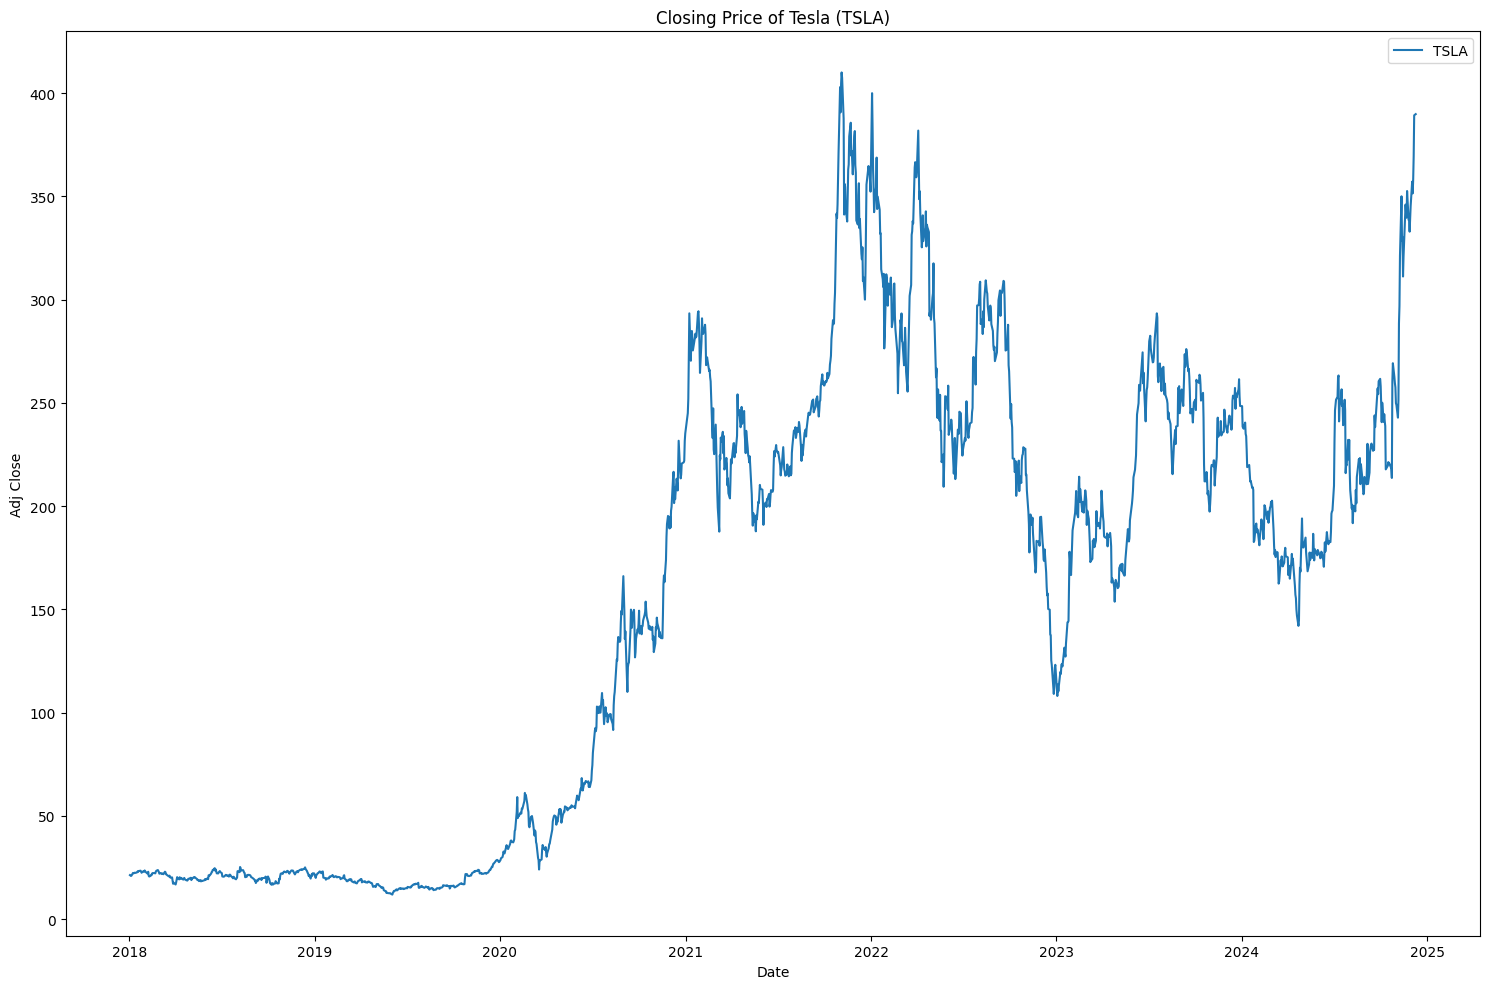

Ticker         TSLA
count   1746.000000
mean     155.716386
std      109.920649
min       11.931333
25%       23.151500
50%      182.224998
75%      241.162498
max      409.970001


In [293]:
# Historical view of Tesla's closing price
close_prices = df['Close']
plt.figure(figsize=(15, 10))

plt.plot(df['Adj Close'], label='TSLA')
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title("Closing Price of Tesla (TSLA)")
plt.legend()

plt.tight_layout()
plt.show()
# Display summary statistics
print(close_prices.describe())

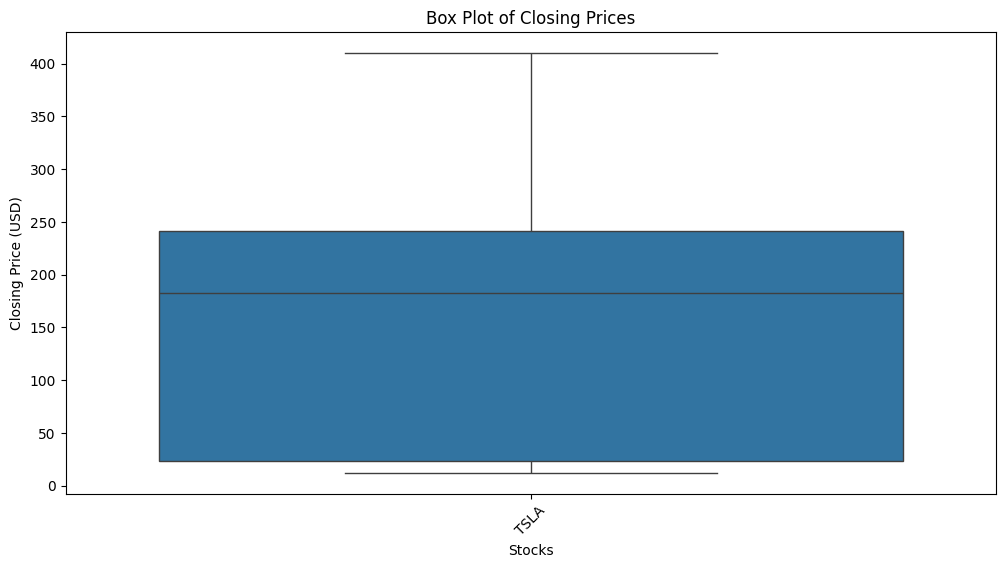

In [294]:
# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(data=close_prices)

# Customize the plot
plt.title('Box Plot of Closing Prices')
plt.xlabel('Stocks')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

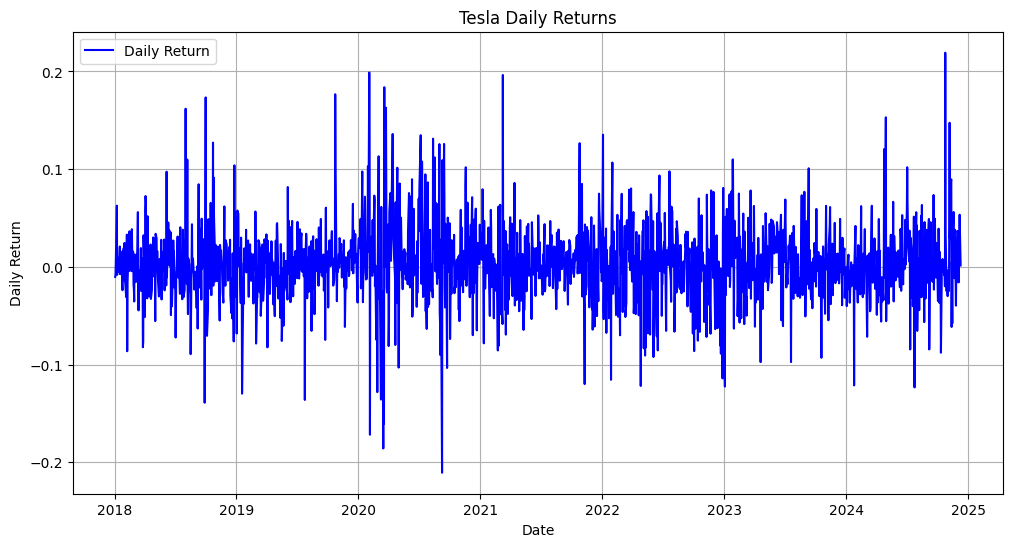

In [295]:
df['Daily Return'] = df['Adj Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='blue')
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

In [376]:
# Calculate positive and negative returns
positive_returnsd = (df['Daily Return'] > 0).sum()
negative_returnsd = (df['Daily Return'] < 0).sum()

# Print the results
print(f"Number of days with positive returns: {positive_returnsd}")
print(f"Number of days with negative returns: {negative_returnsd}")

# Optional: Calculate percentages
total_days = len(df['Daily Return'].dropna())
positive_percentaged = (positive_returnsd / total_days) * 100
negative_percentaged = (negative_returnsd / total_days) * 100

print(f"\nPercentage of positive days: {positive_percentaged:.2f}%")
print(f"Percentage of negative days: {negative_percentaged:.2f}%")

Number of days with positive returns: 908
Number of days with negative returns: 831

Percentage of positive days: 52.18%
Percentage of negative days: 47.76%


In [379]:
# Resample to weekly frequency
weekly_df = df['Adj Close'].resample('W').last()

# Calculate weekly returns
weekly_df['Weekly Return'] = weekly_df.pct_change()

# Calculate positive and negative returns
positive_returnsw = (weekly_df['Weekly Return'] > 0).sum()
negative_returnsw = (weekly_df['Weekly Return'] < 0).sum()

# Print the results
print(f"Number of weeks with positive returns: {positive_returnsw}")
print(f"Number of weeks with negative returns: {negative_returnsw}")

# Optional: Calculate percentages
total_weeks = len(weekly_df['Weekly Return'].dropna())
positive_percentagew = (positive_returnsw / total_weeks) * 100
negative_percentagew = (negative_returnsw / total_weeks) * 100

print(f"\nPercentage of positive weeks: {positive_percentagew:.2f}%")
print(f"Percentage of negative weeks: {negative_percentagew:.2f}%")

Number of weeks with positive returns: 201
Number of weeks with negative returns: 160

Percentage of positive weeks: 55.68%
Percentage of negative weeks: 44.32%


In [380]:
# Resample to monthly frequency
monthly_df = df['Adj Close'].resample('M').last()

# Calculate monthly returns
monthly_df['Monthly Return'] = monthly_df.pct_change()

# Calculate positive and negative returns
positive_returnsm = (monthly_df['Monthly Return'] > 0).sum()
negative_returnsm = (monthly_df['Monthly Return'] < 0).sum()

# Print the results
print(f"Number of months with positive returns: {positive_returnsm}")
print(f"Number of months with negative returns: {negative_returnsm}")

# Optional: Calculate percentages
total_months = len(monthly_df['Monthly Return'].dropna())
positive_percentagem = (positive_returnsm / total_months) * 100
negative_percentagem = (negative_returnsm / total_months) * 100

print(f"\nPercentage of positive months: {positive_percentagem:.2f}%")
print(f"Percentage of negative months: {negative_percentagem:.2f}%")

Number of months with positive returns: 46
Number of months with negative returns: 37

Percentage of positive months: 55.42%
Percentage of negative months: 44.58%


<ipython-input-380-52ff5d3d89f1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Adj Close'].resample('M').last()


In [381]:

# Compare the percentages
print(f"Percentage of positive days: {positive_percentaged:.2f}%")  # Assuming you have this value from your original code
print(f"Percentage of positive weeks: {positive_percentagew:.2f}%")
print(f"Percentage of positive months: {positive_percentagem:.2f}%")

# Determine the most profitable timeframe
if positive_percentaged > positive_percentagew and positive_percentaged > positive_percentagem:
    print("Investing daily seems to be the most profitable based on the data.")
elif positive_percentagew > positive_percentaged and positive_percentagew > positive_percentagem:
    print("Investing weekly seems to be the most profitable based on the data.")
else:
    print("Investing monthly seems to be the most profitable based on the data.")

Percentage of positive days: 52.18%
Percentage of positive weeks: 55.68%
Percentage of positive months: 55.42%
Investing weekly seems to be the most profitable based on the data.


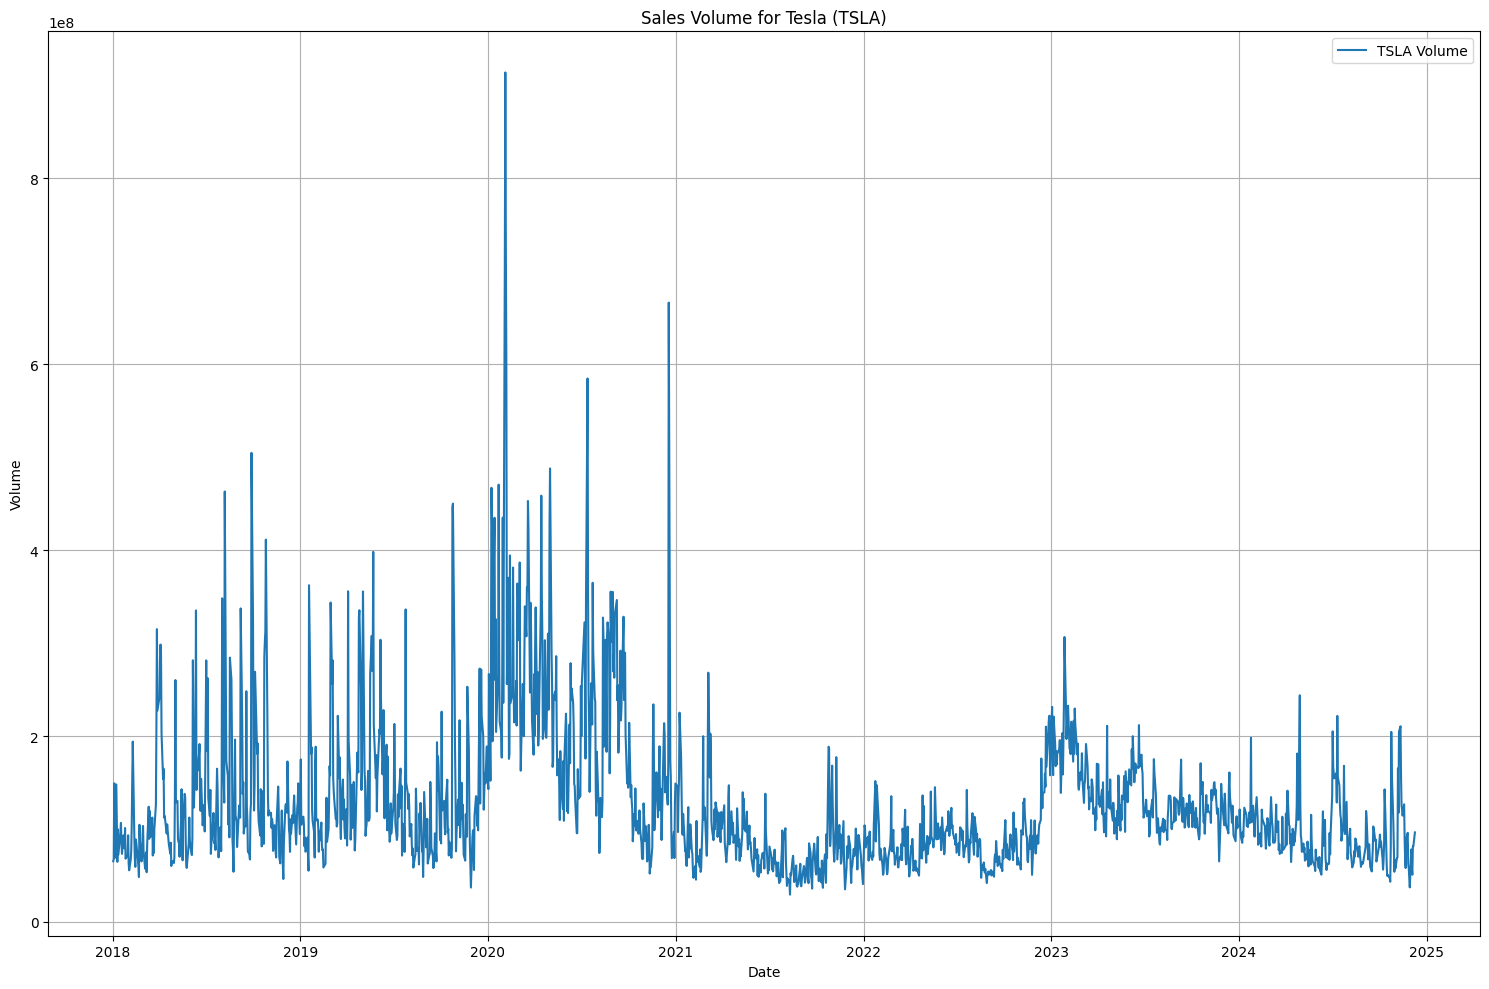

In [297]:
# Plot Tesla's trading volume
plt.figure(figsize=(15, 10))

plt.plot(df['Volume'], label='TSLA Volume')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title('Sales Volume for Tesla (TSLA)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# MODELS


In [399]:
# Define X and y
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

train_size = int(len(df) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the RandomForestRegressor
regressor = RandomForestRegressor(random_state=12)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

mape = MeanAbsolutePercentageError()
mape_value = mape(y_test, y_pred, squared=False)

print(f"Mean Absolute Percentage Error: {mape_value:%}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.4141124751887274
Mean Absolute Percentage Error: 0.109140%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:657: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


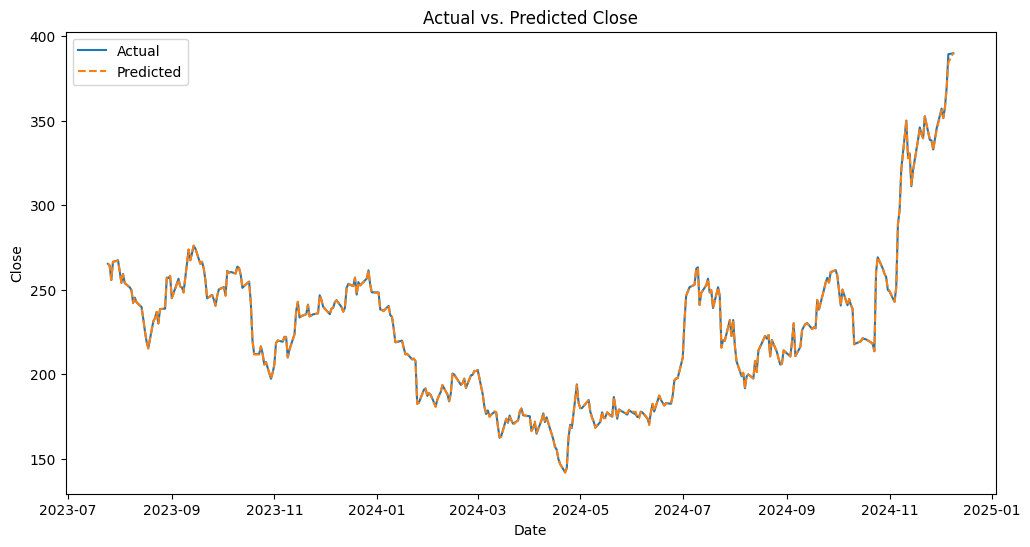

In [415]:
plot_df = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()}, index=y_test.index)

plt.figure(figsize=(12, 6))
plt.plot(plot_df['Actual'], label='Actual')
plt.plot(plot_df['Predicted'], label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [401]:
X = df[['Adj Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

In [402]:
tree = DecisionTreeRegressor()

In [403]:
params = {'max_depth': [1, 2, 3, 4, 5]}

In [303]:
from sklearn.model_selection import GridSearchCV

In [404]:
#instantiate grid search object
tree_grid = GridSearchCV(tree, param_grid = params)

In [405]:
#fit on X and y
tree_grid.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]})

In [406]:
#score the model
tree_grid.score(X, y)

0.9989292195742082

In [407]:
#best parameters?
tree_grid.best_params_

{'max_depth': 5}

In [408]:
#all results as DataFrame
pd.DataFrame(tree_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005024,0.001150,0.003320,0.000572,1,{'max_depth': 1},-279.448931,-0.105962,-0.183026,0.073587,-0.189013,-55.970669,111.739171,5
1,0.006510,0.001116,0.003969,0.000436,2,{'max_depth': 2},-21.799948,0.524962,0.469270,0.653064,0.454068,-3.939717,8.930390,4
2,0.007238,0.001242,0.003877,0.000658,3,{'max_depth': 3},-0.008820,0.751274,0.849350,0.920417,0.867818,0.676008,0.346765,2
3,0.007062,0.000208,0.003420,0.000209,4,{'max_depth': 4},-1.513731,0.811452,0.960595,0.971263,0.957643,0.437444,0.977366,3
4,0.007757,0.000288,0.003447,0.000388,5,{'max_depth': 5},0.298787,0.839827,0.987806,0.992594,0.990267,0.821856,0.267947,1


In [409]:
y = y.map(lambda x: {'Yes': 1, 'No': 0}.get(x, x))

In [410]:
#repeat with different scoring metric
tree_grid = GridSearchCV(tree, param_grid = params, scoring='recall')
tree_grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2385,

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='recall')

In [411]:
#best paramaters
tree_grid.best_params_

{'max_depth': 1}

In [412]:
df = df.asfreq('D')
#set date as index
if 'Date' not in df.columns:
    df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df = df.dropna()


## Autocorrelation



In [313]:
from statsmodels.graphics.tsaplots import plot_acf

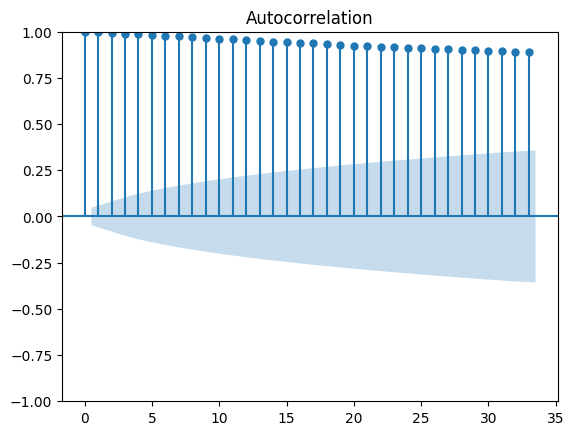

In [413]:
df['Close'] = np.nan_to_num(df['Close'])
plot_acf(df['Close'])
plt.show()

In [414]:
from sktime.transformations.series.acf import AutoCorrelationTransformer
from sktime.datasets import load_airline
y = df['Close']
transformer = AutoCorrelationTransformer(n_lags=36)
y_hat = transformer.fit_transform(y.values)

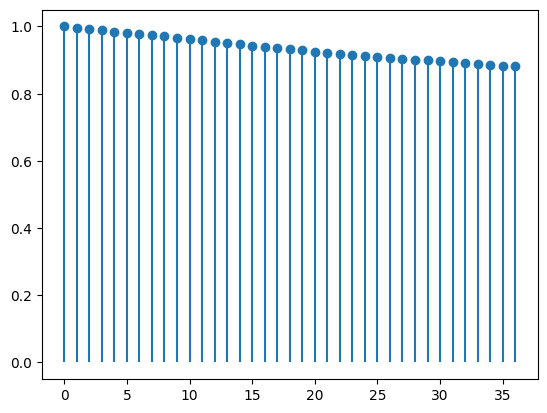

In [316]:
plt.plot(y_hat, 'o')
plt.vlines(range(len(y_hat)), 0, y_hat)

In [317]:
df['Date'] = pd.to_datetime(df.index)
df = df.set_index('Date')
df = df.sort_index()

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Split the dataset into train and test sets.

In [319]:
from sktime.split import temporal_train_test_split

In [320]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

In [321]:
X_train.shape

(1455, 5)

In [322]:
X_test.shape

(291, 5)

## Model 1: Naive Forecast

In [323]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

In [325]:
forecaster = NaiveForecaster()

In [326]:
y_train = y_train.asfreq('D')
forecaster.fit(y_train)

NaiveForecaster()

In [327]:
# fh = ForecastingHorizon(X_test.index, is_relative=False)
fh = [i for i in range(X_test.shape[0])]

In [328]:
y_pred = forecaster.predict(fh=fh)

In [329]:
forecaster.predict(fh = [i for i in range(X_test.shape[0])])

Ticker,TSLA
2023-07-20,291.260010
2023-07-21,262.899994
2023-07-22,262.899994
2023-07-23,262.899994
2023-07-24,262.899994
...,...
2024-05-01,262.899994
2024-05-02,262.899994
2024-05-03,262.899994
2024-05-04,262.899994


In [330]:
df_predictions = X_test.copy()

In [331]:
df_predictions.head(3)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-10-13,251.119995,259.600006,250.220001,258.899994,102073800
2023-10-16,253.919998,255.399994,248.479996,250.050003,88917200
2023-10-17,254.850006,257.179993,247.080002,250.100006,93562900


#### Take the last training dataset value and make that the guess for all future time periods.

In [332]:
df_predictions['last'] = forecaster.predict(fh = [i for i in range(X_test.shape[0]+1)])
df_predictions.head()

Price,Close,High,Low,Open,Volume,last
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2023-10-13,251.119995,259.600006,250.220001,258.899994,102073800,262.899994
2023-10-16,253.919998,255.399994,248.479996,250.050003,88917200,262.899994
2023-10-17,254.850006,257.179993,247.080002,250.100006,93562900,262.899994
2023-10-18,242.679993,254.630005,242.080002,252.699997,125147800,262.899994
2023-10-19,220.110001,230.610001,216.779999,225.949997,170772700,262.899994


#### Plot the historic data, the actual "future" data, and the predicted "future" data.

In [333]:
df_predictions.tail()

Price,Close,High,Low,Open,Volume,last
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-12-03,351.420013,355.690002,348.200012,351.799988,58267200,NaN
2024-12-04,357.929993,358.100006,348.600006,353.000000,50810900,NaN
2024-12-05,369.489990,375.429993,359.500000,359.869995,81403600,NaN
2024-12-06,389.220001,389.489990,370.799988,377.420013,81455800,NaN
2024-12-09,389.790009,404.799988,378.010010,397.609985,96359200,NaN


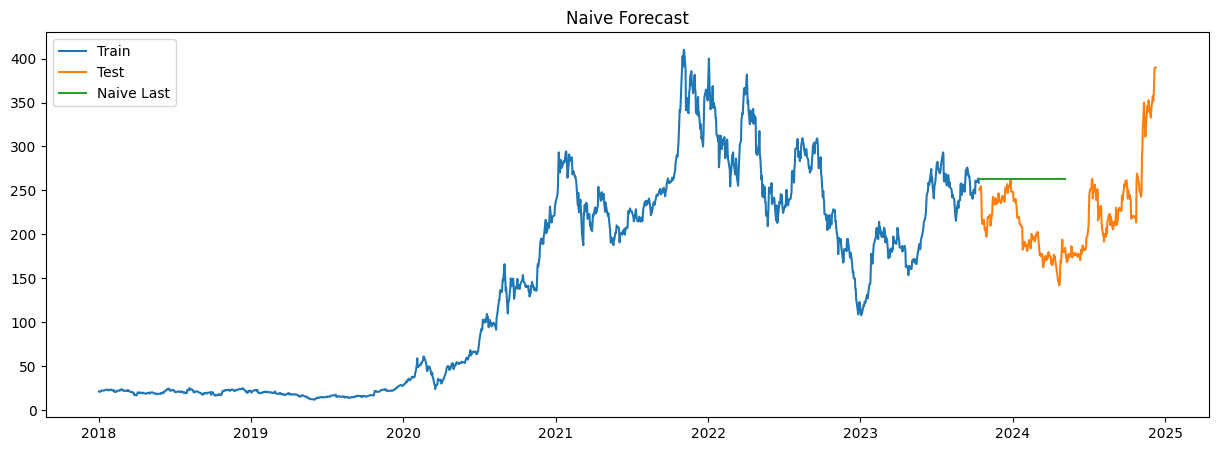

In [334]:
# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(X_train['Close'], label='Train')
plt.plot(X_test['Close'], label='Test')
plt.plot(df_predictions['last'], label='Naive Last')
plt.legend()
plt.title('Naive Forecast')
plt.show()

In [335]:
from sklearn.metrics import mean_squared_error

In [336]:
df_predictions.head()

Price,Close,High,Low,Open,Volume,last
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2023-10-13,251.119995,259.600006,250.220001,258.899994,102073800,262.899994
2023-10-16,253.919998,255.399994,248.479996,250.050003,88917200,262.899994
2023-10-17,254.850006,257.179993,247.080002,250.100006,93562900,262.899994
2023-10-18,242.679993,254.630005,242.080002,252.699997,125147800,262.899994
2023-10-19,220.110001,230.610001,216.779999,225.949997,170772700,262.899994


In [337]:
df = df.fillna(method='ffill')
df = df.dropna()
df['Adj Close'] = df['Close'].fillna(df['Adj Close'].mean())
df_predictions['Close'] = df_predictions['Close'].fillna(method='ffill')  # Forward fill
df_predictions['last'] = df_predictions['last'].fillna(method='ffill')  # Forward fill

<ipython-input-337-e26e505ffedd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
<ipython-input-337-e26e505ffedd>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_predictions['Close'] = df_predictions['Close'].fillna(method='ffill')  # Forward fill
<ipython-input-337-e26e505ffedd>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_predictions['last'] = df_predictions['last'].fillna(method='ffill')  # Forward fill


In [338]:
np.sqrt(mean_squared_error(df_predictions['Close'], df_predictions['last']))

62.5180108631929

In [339]:
mape = MeanAbsolutePercentageError()
mape_value = mape(df_predictions['Close'], df_predictions['last'])

print(f"Mean Absolute Percentage Error: {mape_value:%}")

Mean Absolute Percentage Error: 27.241763%


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:657: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


#Seasonality

In [340]:
X_train.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000


In [341]:
X_train.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-10-06,260.529999,261.649994,250.649994,253.979996,117947000
2023-10-09,259.670013,261.359985,252.050003,255.309998,101377900
2023-10-10,263.619995,268.940002,257.649994,257.750000,122656000
2023-10-11,262.989990,268.600006,260.899994,266.200012,103706300
2023-10-12,258.869995,265.410004,256.630005,262.920013,111508100


In [342]:
df_predictions['seasonal'] = X_train['Close'].iloc[-291:].values

In [343]:
X_test.shape

(291, 5)

In [344]:
X_train.iloc[-12:].shape

(12, 5)

In [345]:
df_predictions.head()

Price,Close,High,Low,Open,Volume,last,seasonal
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,
2023-10-13,251.119995,259.600006,250.220001,258.899994,102073800,262.899994,303.996674
2023-10-16,253.919998,255.399994,248.479996,250.050003,88917200,262.899994,302.869995
2023-10-17,254.850006,257.179993,247.080002,250.100006,93562900,262.899994,296.666656
2023-10-18,242.679993,254.630005,242.080002,252.699997,125147800,262.899994,289.913330
2023-10-19,220.110001,230.610001,216.779999,225.949997,170772700,262.899994,296.453339


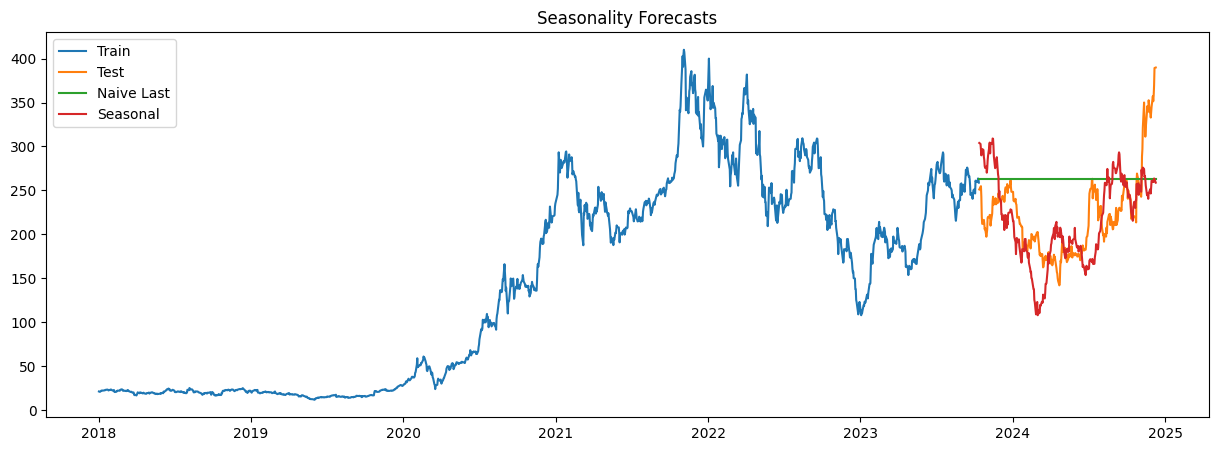

In [346]:
plt.figure(figsize = (15, 5))

plt.plot(X_train['Close'], label='Train')
plt.plot(X_test['Close'], label='Test')
plt.plot(df_predictions['last'], label='Naive Last')
# plt.plot(df_predictions['simple_mean'], label='Historical Mean')
plt.plot(df_predictions['seasonal'], label='Seasonal')

plt.legend()
plt.title('Seasonality Forecasts');

In [347]:
np.sqrt(mean_squared_error(df_predictions['Close'], df_predictions['seasonal']))


48.35835891628423

In [398]:
mape = MeanAbsolutePercentageError()
mape_value = mape(df_predictions['Close'], df_predictions['seasonal'])

print(f"Mean Absolute Percentage Error: {mape_value:%}")

Mean Absolute Percentage Error: 17.411753%


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:657: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


#Multiple Regression


In [350]:
close_prices = df['Adj Close']
X = close_prices[['TSLA']]
y = close_prices['TSLA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [351]:
def create_lags(df, n_lags):
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['Adj Close'].shift(i)
    return df

n_lags = 5  # Number of previous days to use as features
data = create_lags(df, n_lags)

# Drop rows with NaN values caused by the lagging
df = df.dropna()

print(df.head())

Price       Adj Close      Close       High        Low       Open  \
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA   
Date                                                                
2018-01-10  22.320000  22.320000  22.466667  22.000000  22.146667   
2018-01-11  22.530001  22.530001  22.987333  22.217333  22.349333   
2018-01-12  22.414667  22.414667  22.694000  22.244667  22.575333   
2018-01-16  22.670668  22.670668  23.000000  22.320000  22.502666   
2018-01-17  23.143999  23.143999  23.266666  22.650000  22.698000   

Price            Volume Daily Return      lag_1      lag_2      lag_3  \
Ticker             TSLA                                                 
Date                                                                    
2018-01-10   64648500.0     0.003326  22.246000  22.427334  21.105333   
2018-01-11   99682500.0     0.009409  22.320000  22.246000  22.427334   
2018-01-12   72376500.0    -0.005119  22.530001  22.320000  22.246000   
2018-01-1

In [391]:
X = df[[f'lag_{i}' for i in range(1, n_lags + 1)]]

# Target: Today's price
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1392, 5)
Test data shape: (348, 5)


In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 70.15
R2 Score: 0.96


In [393]:
mape = MeanAbsolutePercentageError()
mape_value = mape(y_test, y_pred)

print(f"Mean Absolute Percentage Error: {mape_value:%}")

Mean Absolute Percentage Error: 2.558979%


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:657: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


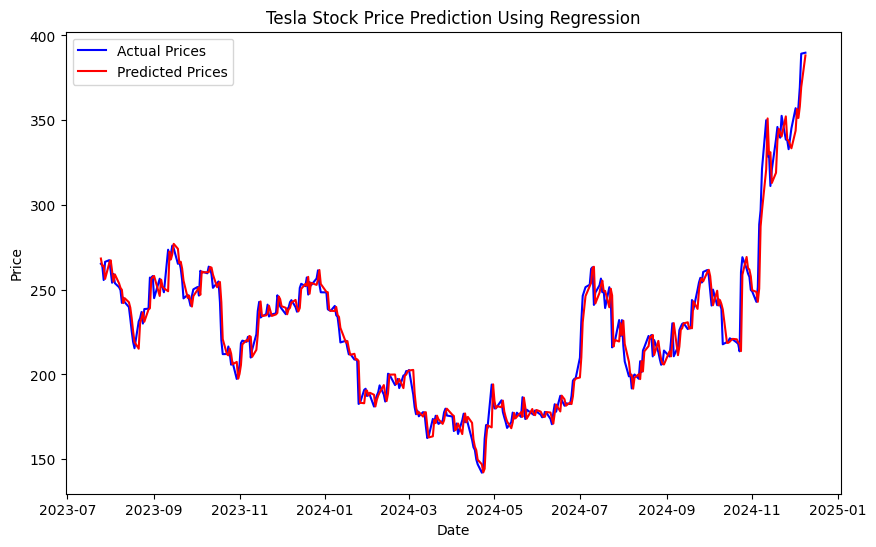

In [394]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Prices", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tesla Stock Price Prediction Using Regression")
plt.show()

<ipython-input-395-895d56ed24fd>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1] = next_price
<ipython-input-395-895d56ed24fd>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1] = next_price
<ipython-input-395-895d56ed24fd>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1] = next_price
<ipython-input-395-895d56ed24fd>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will 

Future Predictions:
Day 1: 268.40
Day 2: 264.03
Day 3: 264.18
Day 4: 256.35
Day 5: 265.74
Day 6: 267.36
Day 7: 260.86
Day 8: 254.74
Day 9: 259.03
Day 10: 253.69
Day 11: 251.11
Day 12: 249.91
Day 13: 242.10
Day 14: 245.00
Day 15: 242.62
Day 16: 239.45
Day 17: 233.27
Day 18: 225.61
Day 19: 219.17
Day 20: 215.18
Day 21: 230.34
Day 22: 232.97
Day 23: 236.66
Day 24: 231.09
Day 25: 238.34
Day 26: 239.04
Day 27: 256.27
Day 28: 257.50
Day 29: 258.11
Day 30: 246.31
Day 31: 255.92
Day 32: 252.14
Day 33: 250.83
Day 34: 249.09
Day 35: 272.45
Day 36: 267.86
Day 37: 271.03
Day 38: 277.05
Day 39: 274.14
Day 40: 265.70
Day 41: 266.51
Day 42: 262.53
Day 43: 255.38
Day 44: 245.15
Day 45: 246.53
Day 46: 243.81
Day 47: 240.04
Day 48: 246.21
Day 49: 249.97
Day 50: 251.42
Day 51: 246.99
Day 52: 260.78
Day 53: 260.24
Day 54: 260.28
Day 55: 260.36
Day 56: 263.37
Day 57: 263.01
Day 58: 258.92
Day 59: 251.47
Day 60: 253.64
Day 61: 254.56
Day 62: 242.68
Day 63: 220.84
Day 64: 211.99
Day 65: 211.28
Day 66: 215.25

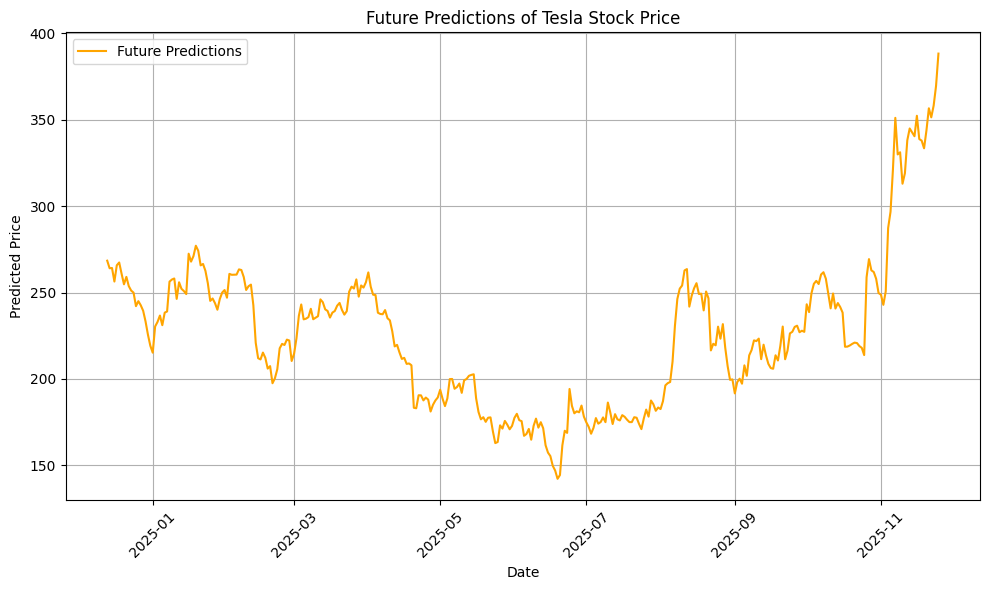

In [395]:
last_data = X.iloc[-1].values.reshape(1, -1)

# Predict future prices iteratively
future_days = 5
future_predictions = []

for _ in range(future_days):
    # Predict next day's price
    next_price = model.predict(last_data)
    future_predictions.append(next_price[0])

    # Update the input data with the predicted value (rolling window)
    last_data = np.roll(last_data, -1)
    last_data[0, -1] = next_price


print("Future Predictions:")
for i, price in enumerate(y_pred, 1):
    print(f"Day {i}: {price.item():.2f}")


import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_pred contains your predictions
future_dates = pd.date_range(start='2024-12-13', periods=len(y_pred), freq='D')

plt.figure(figsize=(10, 6))
plt.plot(future_dates, y_pred, label='Future Predictions', color='orange')
plt.title('Future Predictions of Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()